# FVGP MULTI Task Notebook
In this notebook we will go through many features of FVGP. We will be primarily concerned with regression over a single dimension output and multiple tasks.

## This first cell has nothing to do with gpCAM, it's just a fucntion to plot some results later

In [1]:
import plotly.graph_objects as go
import numpy as np
def plot(x,y,z,data = None):
    fig = go.Figure()
    fig.add_trace(go.Surface(x = x, y = y,z=z))
    if data is not None: 
        fig.add_trace(go.Scatter3d(x=data[:,0], y=data[:,1], z=data[:,2],
                                   mode='markers'))

    fig.update_layout(title='Posterior Mean', autosize=True,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))


    fig.show()

## Import fvgp and relevant libraries

In [2]:
import fvgp
from fvgp import gp, fvgp
import numpy as np
import matplotlib.pyplot as plt

## Defining some input data and testing points

In [3]:
def test_data_function(x):
    data_1 = 100*np.sin(x)+np.cos(x)
    data_2 = 5*np.ones(x.shape)
    data_3 = 1*np.cos(x/10 + 5)
    data_4 = 5*np.sin(x/200)
    data_5 = 10*np.cos(x)
    
    return np.column_stack((data_1, data_2, data_3, data_4, data_5))


In [4]:
x_input = np.linspace(-2*np.pi, 10*np.pi,100)

In [5]:
y_output = test_data_function(x_input)

In [6]:
x_input_test = np.linspace(3*np.pi, 4*np.pi, 100)

## Setting up the fvgp multi task object


In [7]:
obj = fvgp.fvGP(input_space_dim = 1, 
                output_space_dim = 1, 
                output_number = 5, 
                points = x_input.reshape(-1,1),
                values = y_output,
               init_hyperparameters = np.array([10,10,10]))

CAUTION: fvGP reports that you have not provided data variances, they will set to be 1 percent of the data values!


## Training our gaussian process regression on given data


In [8]:
hyper_param_bounds = np.array([[0.0001, 1000],[ 0.0001, 1000],[ 0.0001, 1000]])
obj.train(hyper_param_bounds)

fvGP training started with  500  data points
fvGP hyperparameter tuning in progress. Old hyperparameters:  [10 10 10]  with old log likelihood:  60129.07537720438
method:  global
fvGP is performing a global differential evolution algorithm to find the optimal hyperparameters.
maximum number of iterations:  120
termination tolerance:  0.0001
bounds:  [[1.e-04 1.e+03]
 [1.e-04 1.e+03]
 [1.e-04 1.e+03]]
differential_evolution step 1: f(x)= 4326.77
differential_evolution step 2: f(x)= 4326.77
differential_evolution step 3: f(x)= 4326.77
differential_evolution step 4: f(x)= 4326.77
differential_evolution step 5: f(x)= 4326.77
differential_evolution step 6: f(x)= 2475.85
differential_evolution step 7: f(x)= 2086.99
differential_evolution step 8: f(x)= 2086.99
differential_evolution step 9: f(x)= 2086.99
differential_evolution step 10: f(x)= 2086.99
differential_evolution step 11: f(x)= 2086.99
differential_evolution step 12: f(x)= 2043.13
differential_evolution step 13: f(x)= 2043.13
differe

## Looking at the posterior mean at the test points (remember that we did not define a particularly good kernel)

In [9]:
task_idx = 1

In [10]:
x_linspace = np.linspace(3*np.pi, 4*np.pi,100)
y_linspace = np.linspace(0,4,100)
x_grid, y_grid = np.meshgrid(x_linspace, y_linspace)
post_mean= obj.posterior_mean(np.column_stack((x_input_test, task_idx*np.ones(x_input_test.shape))))
posterior_mean_data = obj.posterior_mean(np.column_stack((x_grid.flatten(), y_grid.flatten())))


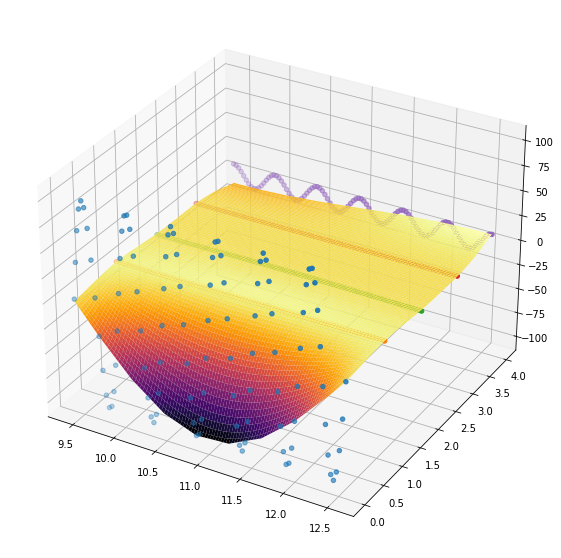

In [11]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')


ax.scatter(post_mean['x'][:,0], np.ones(100)*0, y_output[:,0])
ax.scatter(post_mean['x'][:,0], np.ones(100)*1,y_output[:,1])
ax.scatter(post_mean['x'][:,0], np.ones(100)*2,y_output[:,2])
ax.scatter(post_mean['x'][:,0], np.ones(100)*3,y_output[:,3])
ax.scatter(post_mean['x'][:,0], np.ones(100)*4,y_output[:,4])
ax.plot_surface(x_grid, y_grid, posterior_mean_data['f(x)'].reshape(100,100), rstride=1, cstride=1,cmap='inferno')
# ax.scatter(x_grid.flatten(), y_grid.flatten(), posterior_mean_data['f(x)'])

# pyplot.pcolormesh(x_grid, y_grid, posterior_mean_data['f(x)'].reshape(100,100))
